**Topic:** Challenge Set 6  
**Subject:** Linear Regression and Learning Curve challenges  
**Date:** 01/29/2018  
**Name:** Arina Igumenshcheva  
**Worked with:** N/A

In [134]:
# Import python libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold



**Challenge 1**

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:
- quadratic (second degree polynomial)
- logarithmic (log(x))

(The second one should fit really well, since it has the same form as the underlying model!)

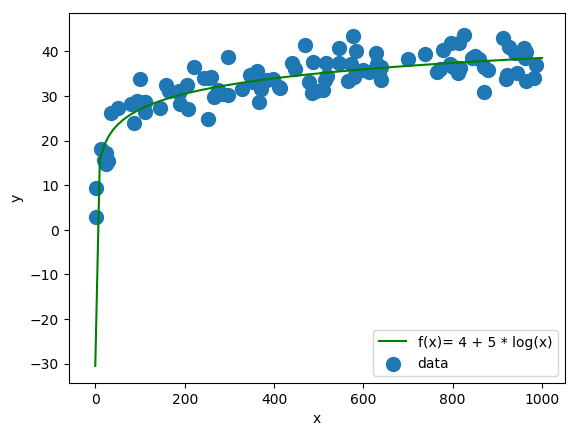

In [135]:
from IPython.core.pylabtools import figsize
figsize(5,5)
plt.style.use('default')

# Seed the random number generator
np.random.seed(5)

# Function that is linearly related to log(x): f(x) = 4 + 5 * log(x)
def f(x):
    return 4 + 5 * np.log(x)

# generate points used for plotting
x_plot = np.linspace(0.001, 1000, 100)

# generate points and keep a subset of them
n_samples = 100
X = np.random.uniform(0.001, 1000, size=n_samples)[:, np.newaxis]
# Generate the y values by taking the defined function and adding a random Gaussian noise term
y = f(X) + np.random.normal(scale=3, size=n_samples)[:, np.newaxis]

# Plot the training data against the ground truth function
fig,ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label='f(x)= 4 + 5 * log(x)', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend();

**Quadratic model**

In [136]:
# Function for plotting the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='best',frameon=True)

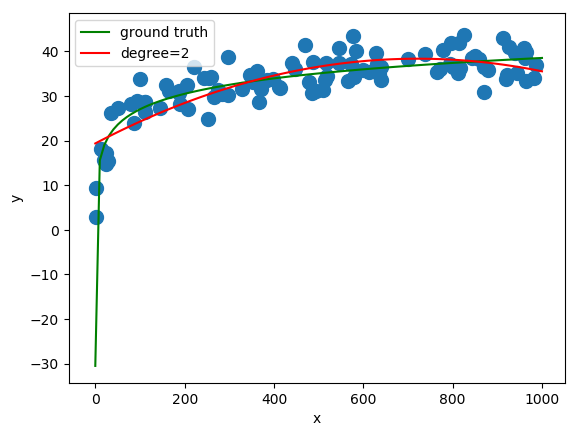

In [137]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 2
# Generate the model type with make_pipeline
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

**Logarithmic model**

In [138]:
def log_transform(arr):
    return np.log(arr)

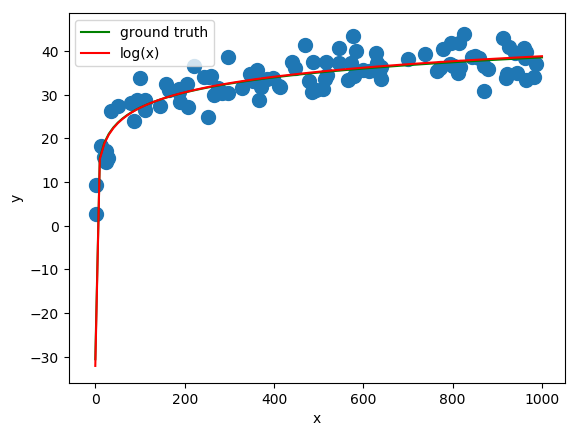

In [139]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Generate the model type with make_pipeline
est = make_pipeline(FunctionTransformer(log_transform, validate=False), LinearRegression())
# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='log(x)')

**Challenge 2**

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

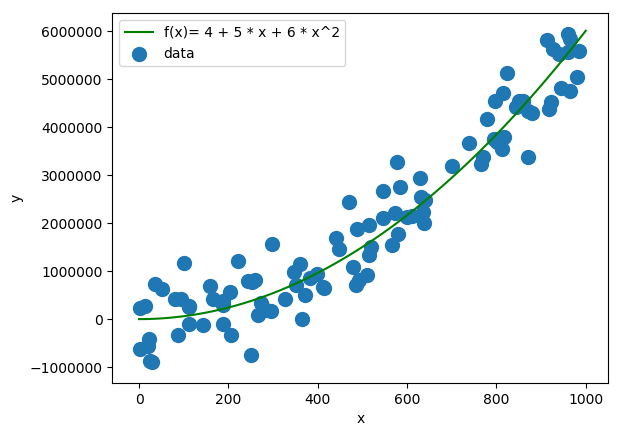

In [140]:
# Seed the random number generator
np.random.seed(5)

# Function that is linearly related to log(x): f(x) = 4 + 5 * log(x)
def f(x):
    return 4 + 5 * x + 6 * x * x

# generate points used for plotting
x_plot = np.linspace(0, 1000, 100)

# generate points and keep a subset of them
n_samples = 100
X = np.random.uniform(0, 1000, size=n_samples)[:, np.newaxis]
# Generate the y values by taking the defined function and adding a random Gaussian noise term
y = f(X) + np.random.normal(scale=500000, size=n_samples)[:, np.newaxis]

# Plot the training data against the ground truth function
fig,ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label='f(x)= 4 + 5 * x + 6 * x^2', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend();

In [141]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Empty model
lr = LinearRegression()
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

0.86581583759262781

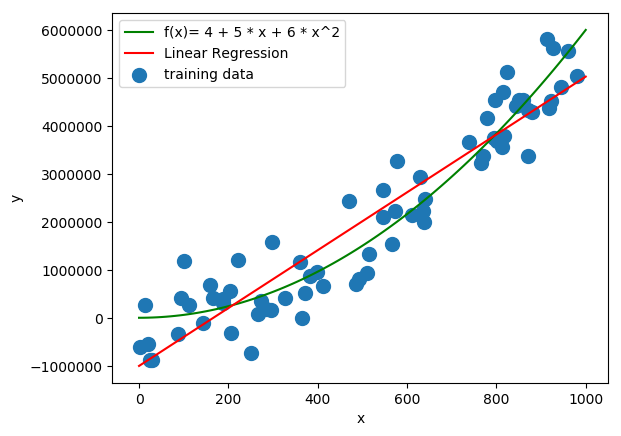

In [142]:
# Plot the training data against the ground truth function and the regression model
fig,ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label='f(x)= 4 + 5 * x + 6 * x^2', color='green')
ax.scatter(X_train, y_train, label='training data', s=100)
ax.plot(x_plot, lr.predict(x_plot[:, np.newaxis]), color='red', label='Linear Regression')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend();

In [143]:
# Calculate mean squared error on your training set. Then calculate it on your test set.
# (You could use sklearn.metrics.mean_squared_error.)

# Training set MSE
print('Training set MSE = ' + str(metrics.mean_squared_error(y_train, lr.predict(X_train))))

# Test set MSE
print('Test set MSE = ' + str(metrics.mean_squared_error(y_test, lr.predict(X_test))))


Training set MSE = 426547252589.0
Test set MSE = 456682652494.0


**Challenge 3**

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:
- training error
- test error
- R squared
- AIC

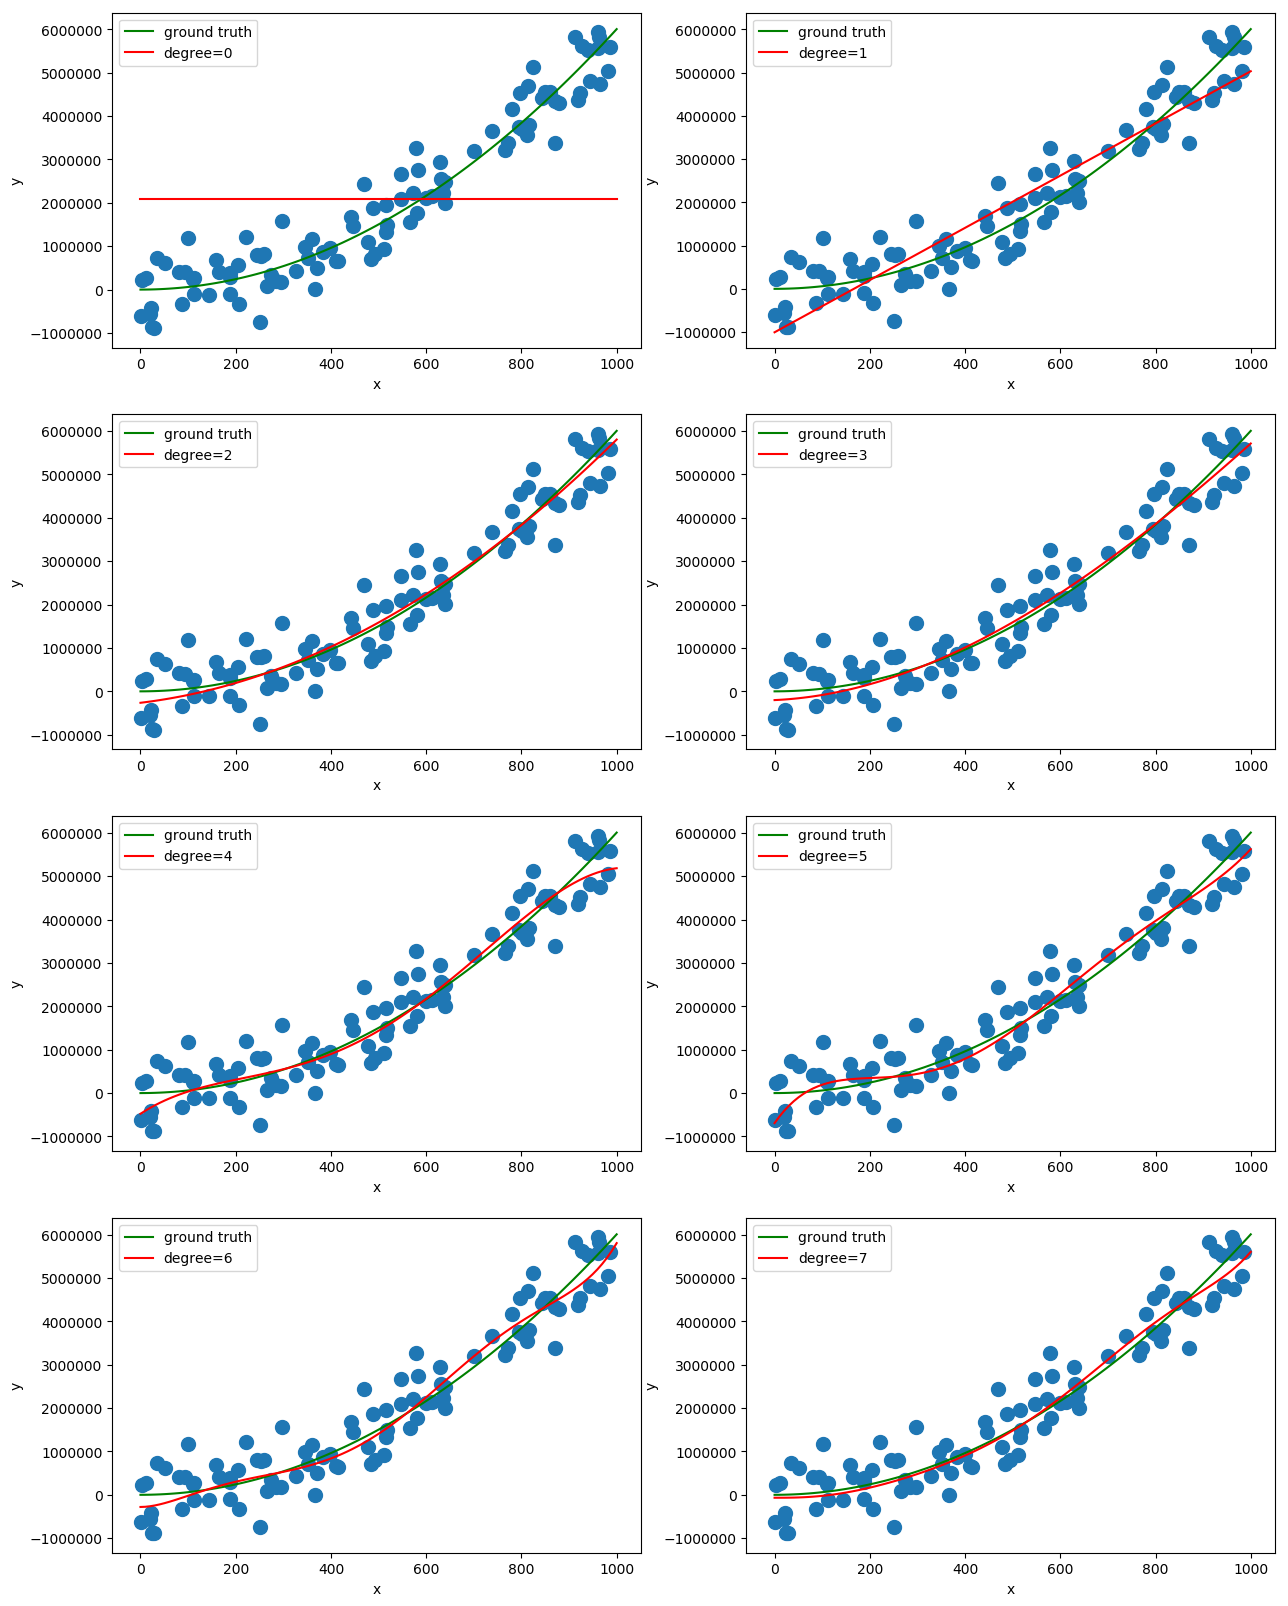

In [144]:
# Plot the models, ground truth and training data
fig, ax_rows = plt.subplots(4, 2, figsize=(15, 20))
for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    # This sets the appropriate axis for each degree (KEEP)
    ax_row_left, ax_row_right = ax_rows[degree//2]
    if degree%2 == 0:
        ax = ax_row_left
    else:
        ax = ax_row_right
    plot_approximation(est, ax, label='degree=%d' % degree)

In [145]:
training_MSEs = []
test_MSEs = []
R_squareds = []
AICs = []

X_poly_train = np.ones(X_train.shape)

for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    
    training_MSEs.append(metrics.mean_squared_error(y_train, est.predict(X_train)))
    test_MSEs.append(metrics.mean_squared_error(y_test, est.predict(X_test)))

    R_squareds.append(metrics.r2_score(y_train, est.predict(X_train)))
    
    # AIC from stats models
    AICs.append(sm.OLS(y_train, sm.add_constant(X_poly_train)).fit().aic)
    X_poly_train = np.append(X_poly_train, np.power(X_train, degree), 1)


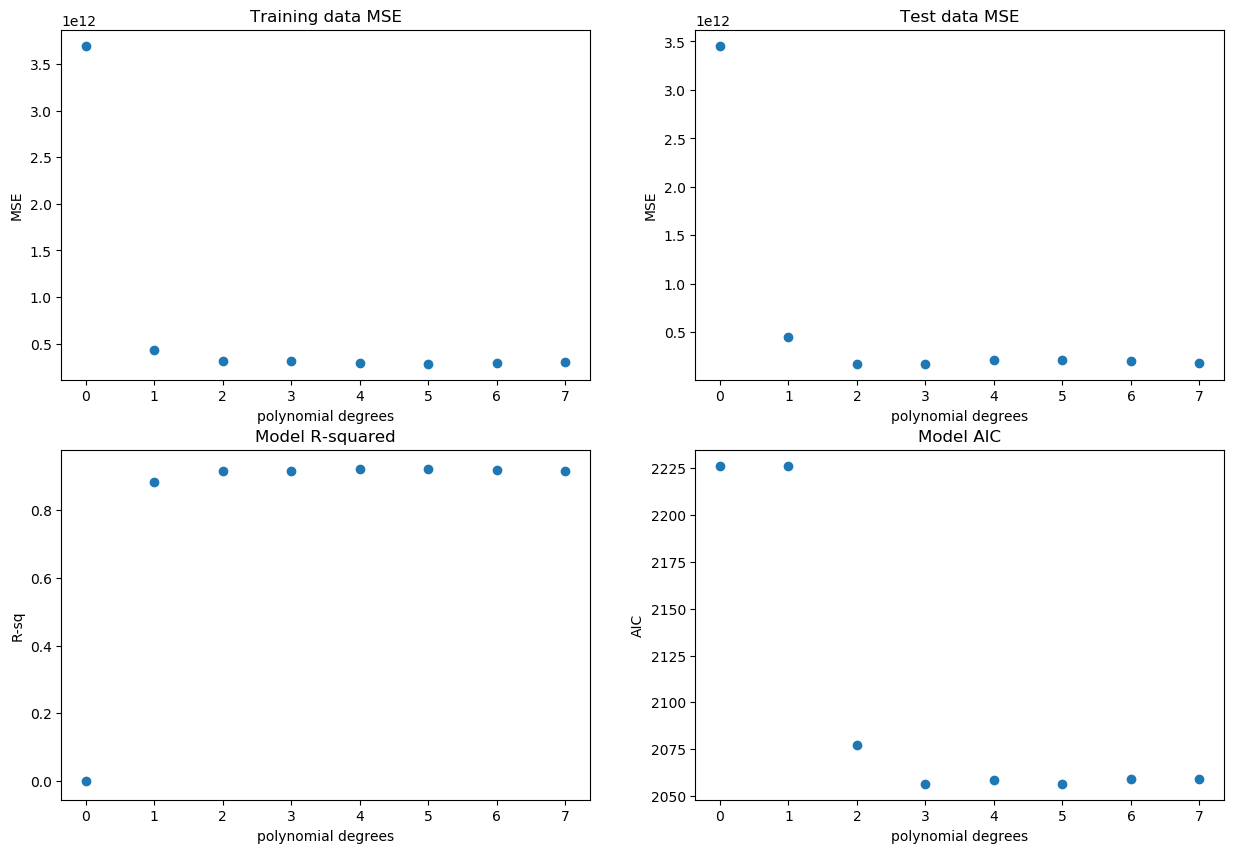

In [146]:
# Plot the models, ground truth and training data
fig, ax_rows = plt.subplots(2, 2, figsize=(15, 10))
"""Polynomial regression degrees performance"""

ax_rows[0, 0].scatter(list(range(8)), training_MSEs)
ax_rows[0, 0].set_ylabel('MSE')
ax_rows[0, 0].set_xlabel('polynomial degrees')
ax_rows[0, 0].set_title('Training data MSE')

ax_rows[0, 1].scatter(list(range(8)), test_MSEs)
ax_rows[0, 1].set_ylabel('MSE')
ax_rows[0, 1].set_xlabel('polynomial degrees')
ax_rows[0, 1].set_title('Test data MSE')

ax_rows[1, 0].scatter(list(range(8)), R_squareds)
ax_rows[1, 0].set_ylabel('R-sq')
ax_rows[1, 0].set_xlabel('polynomial degrees')
ax_rows[1, 0].set_title('Model R-squared')

ax_rows[1, 1].scatter(list(range(8)), AICs)
ax_rows[1, 1].set_ylabel('AIC')
ax_rows[1, 1].set_xlabel('polynomial degrees')
ax_rows[1, 1].set_title('Model AIC');
    

**Challenge 4**

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [147]:
training_MSEs = []
test_MSEs = []

# number of data points to fit in each step
step_size = 5
for m in range(5, len(X), step_size):
    X_train = X[:m]
    X_test = X[m:]
    
    y_train = y[:m]
    y_test = y[m:]
    
    est = LinearRegression()
    est.fit(X_train, y_train)
    
    training_MSEs.append(metrics.mean_squared_error(y_train, est.predict(X_train)))
    test_MSEs.append(metrics.mean_squared_error(y_test, est.predict(X_test)))


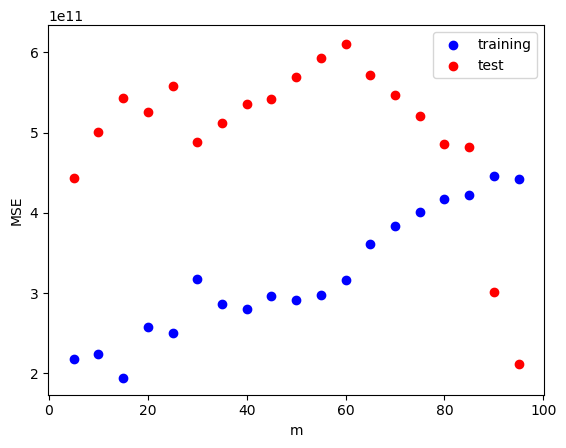

In [148]:
# Plot the train/test errors
fig,ax = plt.subplots(1,1)
ax.scatter(list(range(5, len(X), step_size)), training_MSEs, label='training', c = 'b')
ax.scatter(list(range(5, len(X), step_size)), test_MSEs, label='test', c = 'r')
ax.set_ylabel('MSE')
ax.set_xlabel('m')
ax.legend();